In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from ultralytics import solutions
import numpy as np

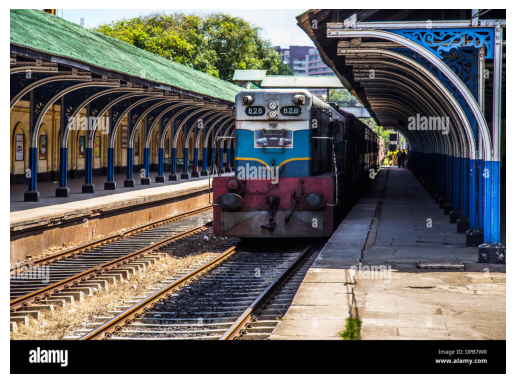

In [3]:
input_image_path = r"input_image\train1.jpg"
img = mpimg.imread(input_image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

# Function to detect humans 

In [7]:
def detect_humans(image,model):
    results = model(image)
    human_count=0
    class_ids = results[0].boxes.cls.cpu().numpy()
    for each in class_ids:
        if each==0:
            human_count+=1
    return human_count


# Function to detect TRAINS 

In [8]:
def detect_train(input_image_path):
    
    model = YOLO("yolov8n.pt")
    
    image = cv2.imread(input_image_path)
    if image is None:
        print("Error: Could not read the image.")
        return

    
    results = model(input_image_path)

    #extract details
    boxes = results[0].boxes.xyxy.cpu().numpy()  #bounding box coordinates
    class_ids = results[0].boxes.cls.cpu().numpy()  #class IDs
    confidences = results[0].boxes.conf.cpu().numpy()  #confidence scores

    train_crops = []  #list for store cropped train image/s

    #crop train image/s
    for i in range(len(class_ids)):
        if class_ids[i] == 6 and confidences[i] >= 0.5:
            x1, y1, x2, y2 = map(int, boxes[i])  #convert to integers
            cropped_train = image[y1:y2, x1:x2]  #crop train region
            train_crops.append(cropped_train)
            
    if not train_crops:
        print("No trains detected in the image.")
    else:
        #remove below for loop and add implemented human detection part
        for i, crop in enumerate(train_crops):
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            count = detect_humans(crop,model)
            plt.axis('off')
            plt.title(f"Train {i+1} Confidence: {confidences[i]:.4f} human count: {count}")
            plt.show()
            



image 1/1 c:\CM3603\IoT\input_image\test1.jpg: 448x640 5 persons, 1 train, 267.2ms
Speed: 12.5ms preprocess, 267.2ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 4 persons, 1 bus, 1 train, 256.8ms
Speed: 7.4ms preprocess, 256.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


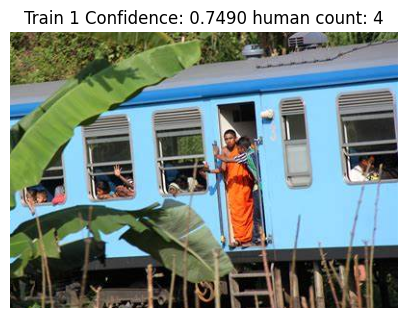


image 1/1 c:\CM3603\IoT\input_image\test2.jpg: 384x640 4 persons, 1 train, 407.0ms
Speed: 2.9ms preprocess, 407.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 288x640 5 persons, 1 train, 194.2ms
Speed: 2.0ms preprocess, 194.2ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 640)


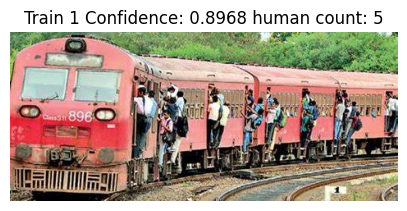


image 1/1 c:\CM3603\IoT\input_image\test3.jpg: 448x640 2 persons, 1 train, 1 traffic light, 269.0ms
Speed: 3.4ms preprocess, 269.0ms inference, 7.2ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 person, 1 train, 233.4ms
Speed: 2.6ms preprocess, 233.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


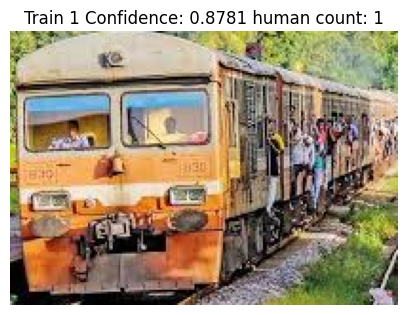


image 1/1 c:\CM3603\IoT\input_image\test4.jpg: 384x640 13 persons, 1 train, 199.3ms
Speed: 2.5ms preprocess, 199.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
No trains detected in the image.

image 1/1 c:\CM3603\IoT\input_image\test5.jpg: 416x640 14 persons, 1 train, 1 backpack, 224.2ms
Speed: 2.1ms preprocess, 224.2ms inference, 7.7ms postprocess per image at shape (1, 3, 416, 640)
No trains detected in the image.

image 1/1 c:\CM3603\IoT\input_image\test6.jpg: 512x640 7 persons, 1 train, 1 backpack, 301.0ms
Speed: 9.3ms preprocess, 301.0ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 640)

0: 448x640 3 persons, 1 train, 1 dog, 1 backpack, 214.6ms
Speed: 5.5ms preprocess, 214.6ms inference, 4.4ms postprocess per image at shape (1, 3, 448, 640)


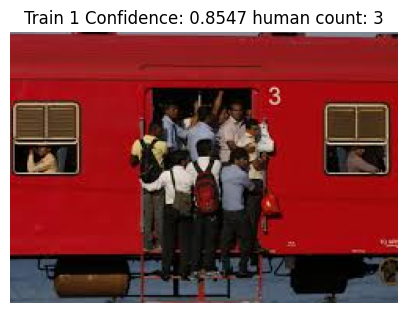


image 1/1 c:\CM3603\IoT\input_image\train1.jpg: 480x640 1 person, 1 train, 262.6ms
Speed: 6.8ms preprocess, 262.6ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 640)

0: 576x640 1 train, 324.9ms
Speed: 12.5ms preprocess, 324.9ms inference, 8.9ms postprocess per image at shape (1, 3, 576, 640)


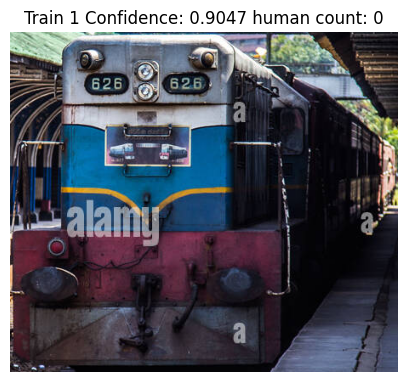

In [9]:
for root,dir,files in os.walk("input_image"):
    for each in files:
        image_path = os.path.join(root,each) 
        detect_train(image_path)


Functions to detect humans

In [ ]:

detect_humans("input_image\\test2.jpg")

d
Ultralytics Solutions:  {'region': None, 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'records': 5, 'model': 'yolov8n.pt', 'classes': [0]}



0: 384x640 4 persons, 530.2ms
Speed: 13.4ms preprocess, 530.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)
SolutionResults(classwise_count={'person': {'IN': 0, 'OUT': 0}}, total_tracks=4)
